In [378]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tool
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [379]:
#read
CPBL_data = pd.read_excel("CPBL_batter.xlsx")
MLB_data = pd.read_excel("MLB_batter.xlsx")


In [380]:
#first view
CPBL_data.info()
CPBL_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   球員        307 non-null    object 
 1   背號        307 non-null    int64  
 2   PA        307 non-null    int64  
 3   AVG       307 non-null    float64
 4   OBP       307 non-null    float64
 5   SLG       307 non-null    float64
 6   ISO       307 non-null    float64
 7   BABIP     303 non-null    float64
 8   BIP%      307 non-null    float64
 9   OPS       307 non-null    float64
 10  OPS+      307 non-null    float64
 11  tOPS+     307 non-null    float64
 12  RC        307 non-null    float64
 13  wOBA      307 non-null    float64
 14  BB%       307 non-null    float64
 15  BB/K      300 non-null    float64
 16  K%        307 non-null    float64
 17  PutAway%  305 non-null    float64
 18  隊伍        307 non-null    object 
dtypes: float64(15), int64(2), object(2)
memory usage: 45.7+ KB


背號          PA         AVG         OBP         SLG        ISO  \
count  307.000000  307.000000  307.000000  307.000000  307.000000  307.00000   
mean    42.700326  161.719870    0.223446    0.279671    0.298710    0.07527   
std     30.305764  158.669838    0.115894    0.123238    0.179709    0.08628   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.00000   
25%     14.000000   19.500000    0.178000    0.241000    0.218000    0.00000   
50%     38.000000  112.000000    0.239000    0.300000    0.315000    0.06300   
75%     67.000000  281.500000    0.275500    0.338500    0.364000    0.10700   
max     99.000000  530.000000    1.000000    1.000000    2.000000    1.00000   

            BABIP        BIP%         OPS        OPS+       tOPS+          RC  \
count  303.000000  307.000000  307.000000  307.000000  307.000000  307.000000   
mean     0.278937   69.173941    0.578365   69.177199   68.669055   17.062541   
std      0.132466   14.149959    0.292690   85.103165   84.502510   20.225563   
min      0.000000    0.000000    0.000000 -100.000000 -100.000000    0.000000   
25%      0.234500   63.900000    0.473000   40.150000   38.600000    1.050000   
50%      0.289000   71.200000    0.619000   80.400000   81.300000    8.000000   
75%      0.333000   76.600000    0.694500  103.250000  103.650000   27.950000   
max      1.000000  100.000000    3.000000  771.200000  769.500000   90.300000   

             wOBA         BB%       BB/K          K%    PutAway%  
count  307.000000  307.000000  300.00000  307.000000  305.000000  
mean     0.261534    6.560261        inf   22.021498   41.009836  
std      0.123541    5.552016        NaN   14.453583   18.174424  
min      0.000000    0.000000    0.00000    0.000000    0.000000  
25%      0.221500    3.250000    0.16700   14.400000   30.800000  
50%      0.283000    6.000000    0.33500   19.100000   38.000000  
75%      0.313000    8.950000    0.52875   25.750000   50.000000  
max      1.244000   50.000000        inf  100.000000  100.000000

In [381]:
MLB_data.info()
MLB_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    274 non-null    object 
 1   Team    274 non-null    object 
 2   G       274 non-null    int64  
 3   PA      274 non-null    int64  
 4   HR      274 non-null    int64  
 5   R       274 non-null    int64  
 6   RBI     274 non-null    int64  
 7   SB      274 non-null    int64  
 8   BB%     274 non-null    float64
 9   K%      274 non-null    float64
 10  ISO     274 non-null    float64
 11  BABIP   274 non-null    float64
 12  AVG     274 non-null    float64
 13  OBP     274 non-null    float64
 14  SLG     274 non-null    float64
 15  wOBA    274 non-null    float64
 16  xwOBA   274 non-null    float64
 17  wRC+    274 non-null    int64  
 18  BsR     274 non-null    float64
 19  Off     274 non-null    float64
 20  Def     274 non-null    float64
 21  WAR     274 non-null    float64
dtypes:

G          PA          HR           R         RBI          SB  \
count  274.000000  274.000000  274.000000  274.000000  274.000000  274.000000   
mean   146.653285  608.273723   21.770073   77.080292   74.751825   12.627737   
std     10.863803   62.458615    9.829781   17.471089   19.322321   11.623525   
min    116.000000  502.000000    2.000000   45.000000   23.000000    0.000000   
25%    139.000000  553.000000   15.000000   64.000000   61.000000    3.250000   
50%    149.000000  608.000000   20.000000   74.000000   74.000000    9.000000   
75%    155.750000  654.750000   27.000000   87.000000   86.000000   19.000000   
max    163.000000  735.000000   60.000000  146.000000  144.000000   67.000000   

              BB%          K%         ISO       BABIP         AVG         OBP  \
count  274.000000  274.000000  274.000000  274.000000  274.000000  274.000000   
mean     0.087865    0.207252    0.178080    0.297372    0.258325    0.329496   
std      0.028755    0.055013    0.051645    0.028208    0.023763    0.029702   
min      0.025000    0.031000    0.067000    0.225000    0.196000    0.268000   
25%      0.067250    0.168000    0.141000    0.279000    0.242000    0.312000   
50%      0.086000    0.208500    0.174000    0.297500    0.256500    0.327000   
75%      0.108000    0.251750    0.207000    0.315750    0.273000    0.346000   
max      0.189000    0.344000    0.379000    0.376000    0.332000    0.458000   

              SLG        wOBA       xwOBA        wRC+         BsR         Off  \
count  274.000000  274.000000  274.000000  274.000000  274.000000  274.000000   
mean     0.436394    0.331109    0.337139  113.346715    0.313139   10.487591   
std      0.060738    0.031110    0.033474   22.021141    3.349579   17.039850   
min      0.306000    0.263000    0.261000   65.000000   -6.100000  -24.600000   
25%      0.394000    0.313000    0.316000   99.000000   -2.175000   -0.400000   
50%      0.431000    0.328000    0.332000  112.000000   -0.450000    8.300000   
75%      0.469000    0.347000    0.352000  124.000000    2.275000   17.900000   
max      0.701000    0.476000    0.480000  220.000000   11.100000   96.000000   

              Def         WAR  
count  274.000000  274.000000  
mean    -2.006934    2.967883  
std      9.927786    2.002487  
min    -19.500000   -1.100000  
25%    -10.050000    1.500000  
50%     -1.950000    2.900000  
75%      5.025000    3.900000  
max     24.500000   11.300000

In [382]:
df = pd.concat([MLB_data, CPBL_data], axis=0, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      274 non-null    object 
 1   Team      274 non-null    object 
 2   G         274 non-null    float64
 3   PA        581 non-null    int64  
 4   HR        274 non-null    float64
 5   R         274 non-null    float64
 6   RBI       274 non-null    float64
 7   SB        274 non-null    float64
 8   BB%       581 non-null    float64
 9   K%        581 non-null    float64
 10  ISO       581 non-null    float64
 11  BABIP     577 non-null    float64
 12  AVG       581 non-null    float64
 13  OBP       581 non-null    float64
 14  SLG       581 non-null    float64
 15  wOBA      581 non-null    float64
 16  xwOBA     274 non-null    float64
 17  wRC+      274 non-null    float64
 18  BsR       274 non-null    float64
 19  Off       274 non-null    float64
 20  Def       274 non-null    float6

In [383]:
#check column
same_col = set(CPBL_data.columns) & set(MLB_data.columns)
diff_col = set(CPBL_data.columns) ^ set(MLB_data.columns)
print("same column: ", same_col, "\ndiff. column: ", diff_col)


same column:  {'ISO', 'BABIP', 'PA', 'AVG', 'BB%', 'wOBA', 'K%', 'OBP', 'SLG'} 
diff. column:  {'Def', 'BIP%', 'OPS+', 'Team', '隊伍', 'SB', 'BB/K', 'wRC+', '背號', 'G', 'R', 'RC', 'xwOBA', 'PutAway%', 'OPS', 'tOPS+', 'WAR', '球員', 'HR', 'Name', 'BsR', 'RBI', 'Off'}


In [384]:
#data clean
Scale = 1.232
CPBL_Game = 120
MLB_Game = 162

CPBL_data.drop(columns=['BB/K','OPS','tOPS+','RC'], inplace=True)
MLB_data.drop(columns=['G','xwOBA','Def','SB'], inplace=True)
MLB_data['OPS+'] = 100 * (MLB_data['OBP']/MLB_data['OBP'].mean() + (MLB_data['SLG']/MLB_data['SLG'].mean()) - 1)
CPBL_data['Off'] = CPBL_data['Off'] = ((CPBL_data['wOBA'] / CPBL_data['wOBA'].mean()) - 1) * 100
CPBL_data.rename(columns={
    '球員': 'Name',
    '背號': 'Num',
    '隊伍': 'Team'
}, inplace=True)
MLB_data[['K%', 'BB%']] = MLB_data[['K%', 'BB%']] * 100
CPBL_data['PA_scaled'] = CPBL_data['PA']/CPBL_Game
MLB_data['PA_scaled'] = MLB_data['PA']/MLB_Game

df = pd.concat([MLB_data, CPBL_data], axis=0, ignore_index=True)
df = df[df['PA_scaled'] > 1]
Scale = 600
df['HR_scaled'] = df['HR'] * Scale / df['PA']
df['R_scaled'] = df['R'] * Scale / df['PA']
df['RBI_scaled'] = df['RBI'] * Scale / df['PA']
df.drop(columns=['HR','R','RBI','PA'], inplace=True)

In [385]:
oe = OrdinalEncoder()
df['Num_Ordi'] = oe.fit_transform(df[['Num']])
df['Team_Ordi'] = oe.fit_transform(df[['Team']])
Num_original = np.array(sorted(df['Num'].unique()))
'''df['Num_Bi'] = df['Num_Ordi'].apply(tool.custom_binary_encode)
df['Team_Bi'] = df['Team_Ordi'].apply(tool.custom_binary_encode)'''
df.head()

Name Team   BB%    K%    ISO  BABIP    AVG    OBP    SLG   wOBA  \
0      Aaron Judge  NYY  18.3  23.6  0.357  0.376  0.331  0.457  0.688  0.463   
1      Cal Raleigh  SEA  13.8  26.7  0.342  0.248  0.247  0.359  0.589  0.392   
2   Bobby Witt Jr.  KCR   7.1  18.2  0.205  0.334  0.295  0.351  0.501  0.360   
3    Shohei Ohtani  LAD  15.0  25.7  0.340  0.315  0.282  0.392  0.622  0.418   
4  Geraldo Perdomo  ARI  13.1  11.5  0.173  0.303  0.290  0.389  0.462  0.370   

   ...        OPS+  PA_scaled  Num  BIP%  PutAway%  HR_scaled    R_scaled  \
0  ...  196.352167   4.191358  NaN   NaN       NaN  46.833579  121.060383   
1  ...  143.923891   4.351852  NaN   NaN       NaN  51.063830   93.617021   
2  ...  121.330687   4.240741  NaN   NaN       NaN  20.087336   86.462882   
3  ...  161.501148   4.487654  NaN   NaN       NaN  45.392022  120.495186   
4  ...  123.926565   4.444444  NaN   NaN       NaN  16.666667   81.666667   

   RBI_scaled  Num_Ordi  Team_Ordi  
0  100.736377       NaN       20.0  
1  106.382979       NaN       25.0  
2   76.855895       NaN       13.0  
3   84.181568       NaN       15.0  
4   83.333333       NaN        1.0  

[5 rows x 24 columns]

In [386]:
num_col = df.select_dtypes(include=[np.number]).columns
df_num = df[num_col]
df_num.drop(columns= ['Num','Num_Ordi','Team_Ordi'], inplace = True)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 577
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BB%         421 non-null    float64
 1   K%          421 non-null    float64
 2   ISO         421 non-null    float64
 3   BABIP       421 non-null    float64
 4   AVG         421 non-null    float64
 5   OBP         421 non-null    float64
 6   SLG         421 non-null    float64
 7   wOBA        421 non-null    float64
 8   wRC+        274 non-null    float64
 9   BsR         274 non-null    float64
 10  Off         421 non-null    float64
 11  WAR         274 non-null    float64
 12  OPS+        421 non-null    float64
 13  PA_scaled   421 non-null    float64
 14  BIP%        147 non-null    float64
 15  PutAway%    147 non-null    float64
 16  HR_scaled   274 non-null    float64
 17  R_scaled    274 non-null    float64
 18  RBI_scaled  274 non-null    float64
dtypes: float64(19)
memory usage: 65.8 

C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\720562906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(columns= ['Num','Num_Ordi','Team_Ordi'], inplace = True)


In [387]:
df_num["CPBL"] = False
df_num.loc[df_num["HR_scaled"].isnull() == True, "CPBL"] = True

C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\313396077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["CPBL"] = False


In [388]:
num_cols = df_num.select_dtypes(include='number').columns
scaler = RobustScaler()

df_num[num_cols] = pd.DataFrame(
    scaler.fit_transform(df_num[num_cols]),
    columns=num_cols,
    index=df_num.index
)

C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\4182460360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[num_cols] = pd.DataFrame(


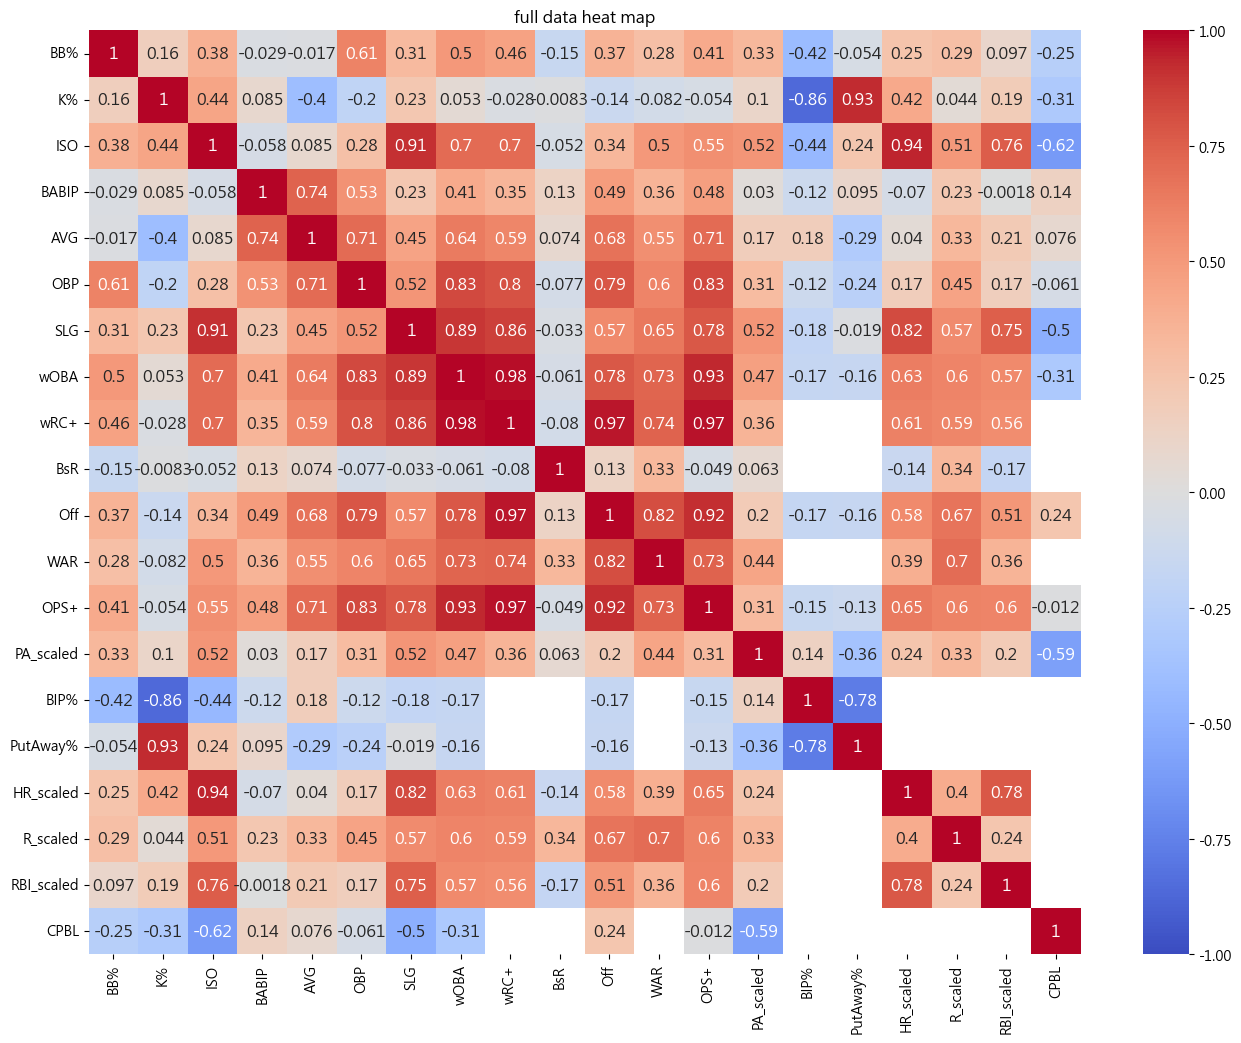

In [389]:
tool.plot_heatmap(df_num, 'full data heat map')

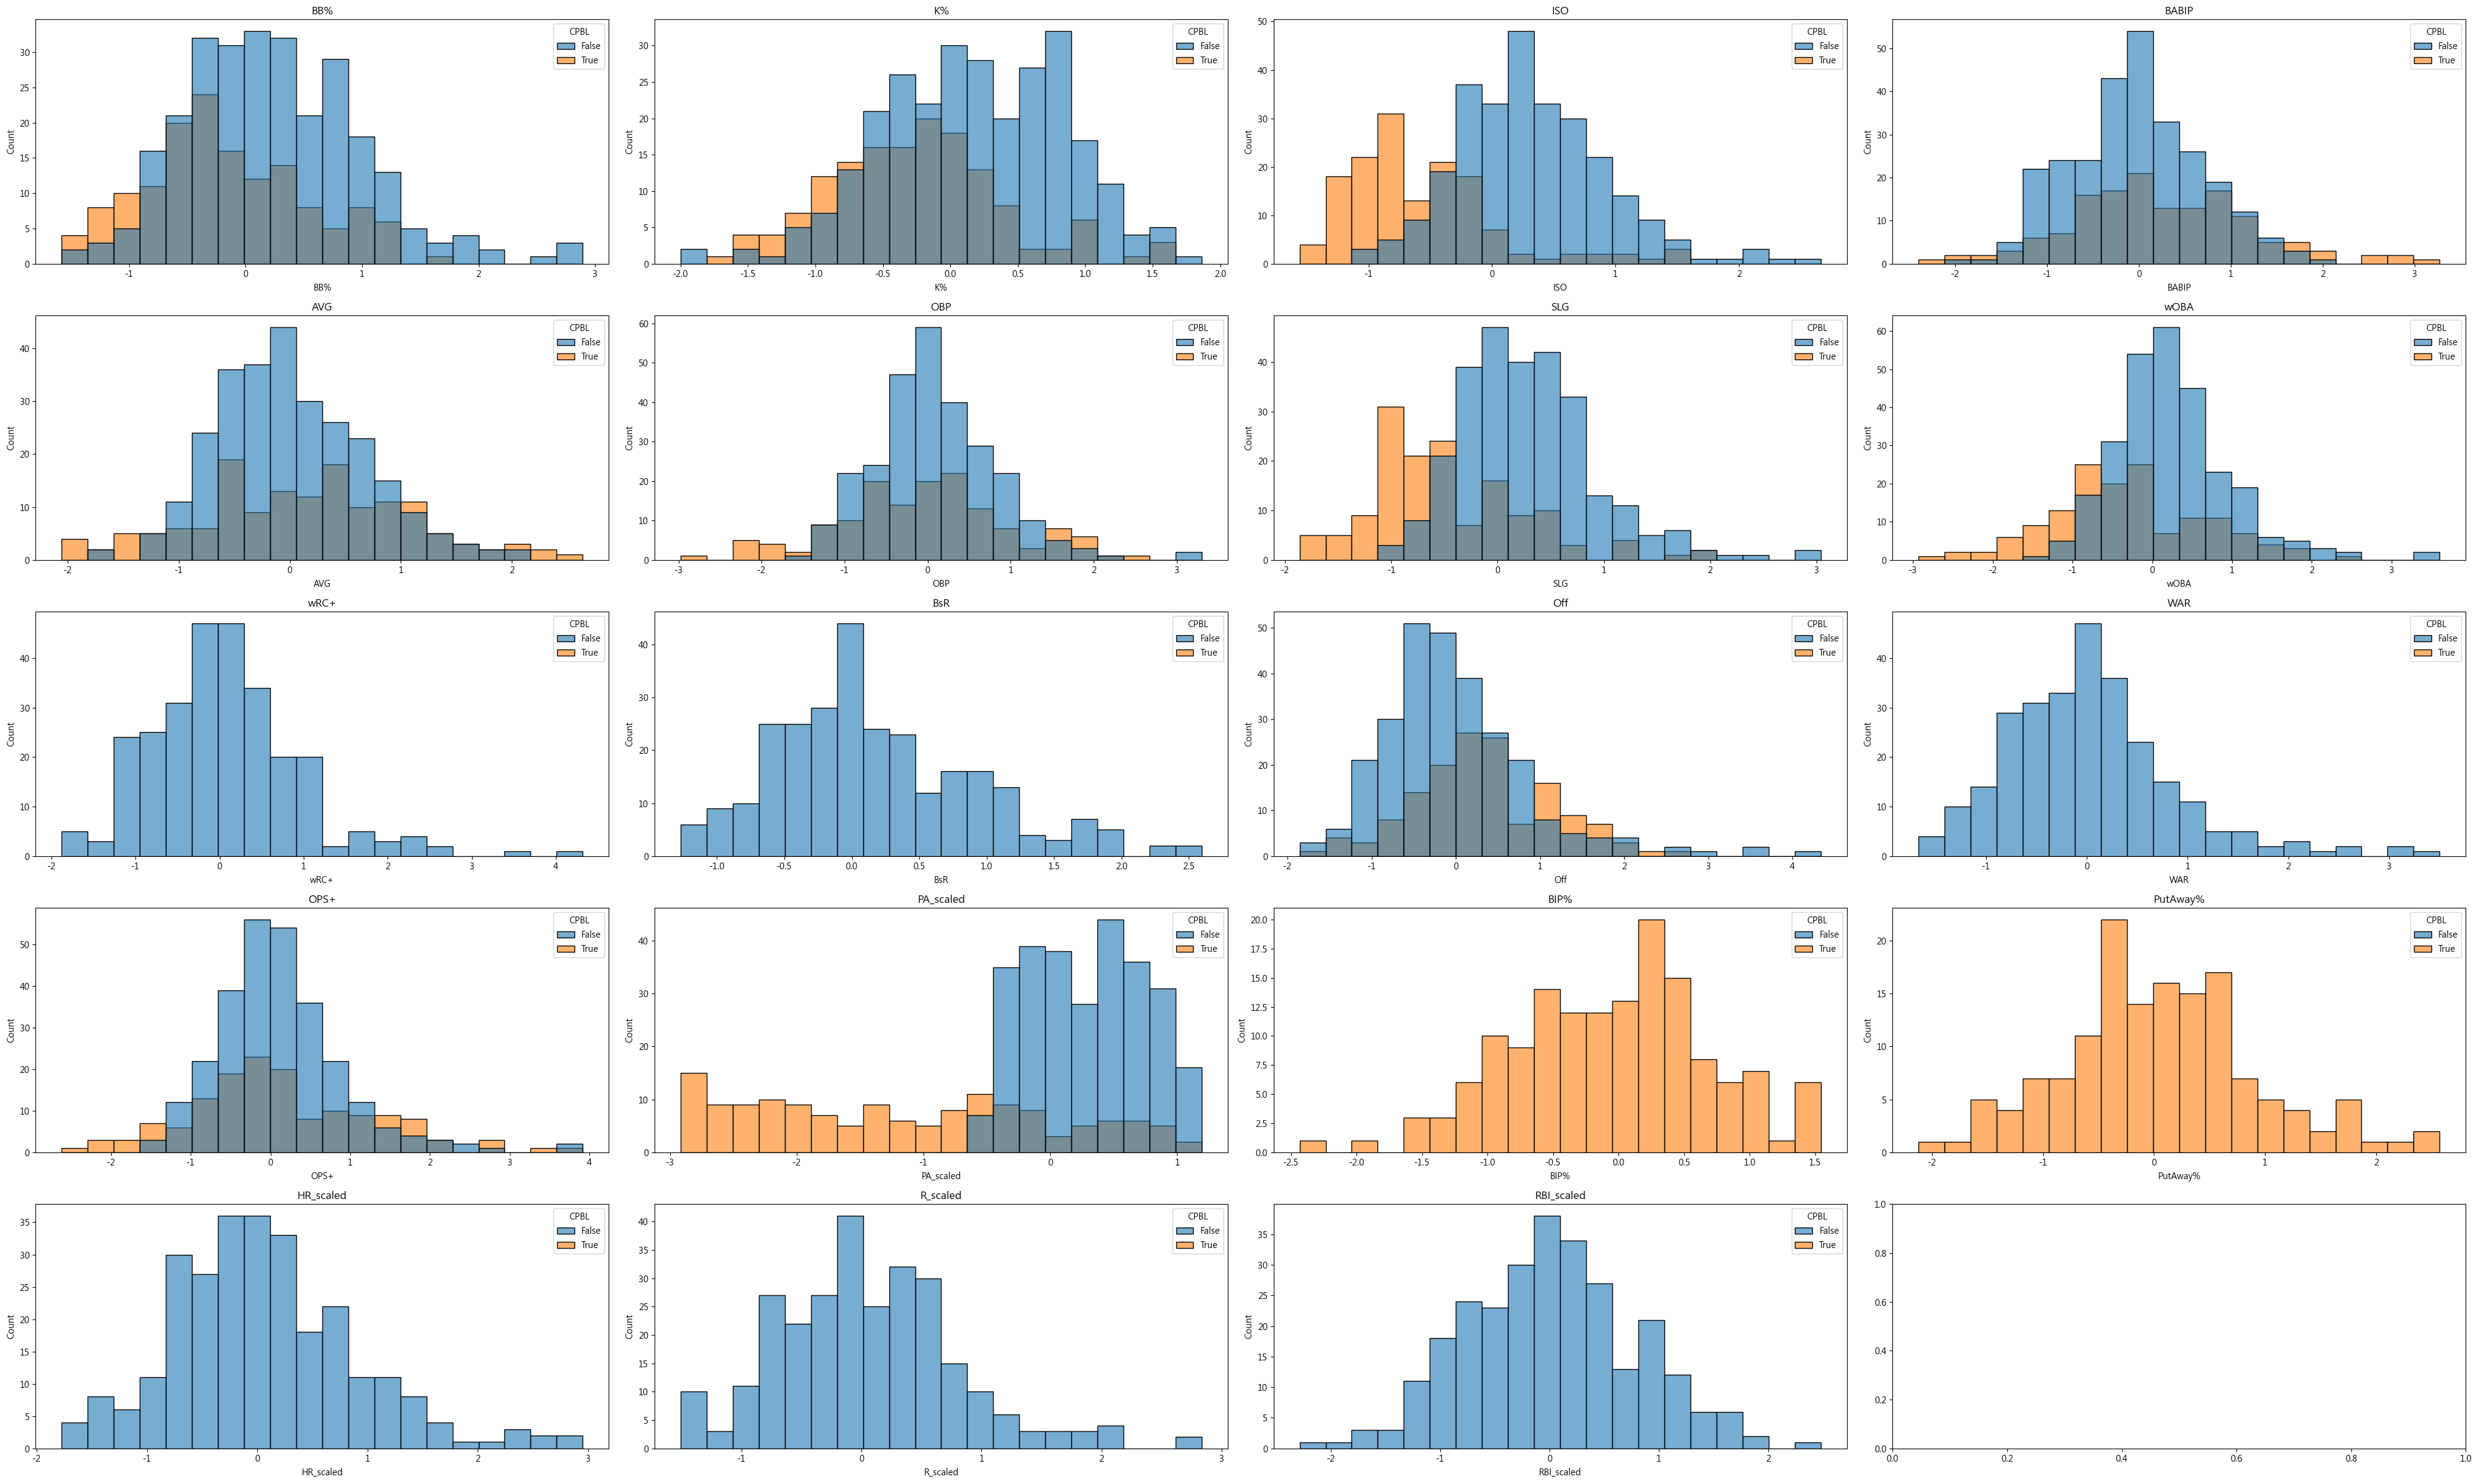

<Figure size 640x480 with 0 Axes>

In [390]:
col = [c for c in df_num.columns if c != 'CPBL']  

fig, axes = plt.subplots(5, 4, figsize=(40, 24))
axes = axes.flatten()

for i, c in enumerate(col):
    sns.histplot(data=df_num, x=c, hue='CPBL', bins=20, alpha=0.6, ax=axes[i])
    axes[i].set_title(c)

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

In [391]:
'''df_clean = df_num.dropna(subset=['HR_scaled'])

X_train = df_clean[['ISO', 'SLG','OPS+']]
y_train = df_clean['HR_scaled']


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

missing = df_num.loc[df_num['HR_scaled'].isna(), ['ISO', 'SLG','OPS+']]
predicted_values = linear_model.predict(missing)

df_num.loc[df_num['HR_scaled'].isna(), 'HR_scaled'] = predicted_values
'''

"df_clean = df_num.dropna(subset=['HR_scaled'])\n\nX_train = df_clean[['ISO', 'SLG','OPS+']]\ny_train = df_clean['HR_scaled']\n\n\nlinear_model = LinearRegression()\nlinear_model.fit(X_train, y_train)\n\nmissing = df_num.loc[df_num['HR_scaled'].isna(), ['ISO', 'SLG','OPS+']]\npredicted_values = linear_model.predict(missing)\n\ndf_num.loc[df_num['HR_scaled'].isna(), 'HR_scaled'] = predicted_values\n"

In [392]:
feature = ['ISO', 'SLG', 'OPS+', 'HR_scaled']

imputer = IterativeImputer(random_state=42, sample_posterior=True, max_iter=10)

imputed_array = imputer.fit_transform(df_num[feature])

df_num[feature] = imputed_array

C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\2663931319.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[feature] = imputed_array


In [393]:
df_clean = df_num.dropna(subset=['wRC+'])

X_train = df_clean[['Off', 'OPS+', 'wOBA']]
y_train = df_clean['wRC+']


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

missing = df_num.loc[df_num['wRC+'].isna(), ['Off', 'OPS+', 'wOBA']]
predicted_values = linear_model.predict(missing)

df_num.loc[df_num['wRC+'].isna(), 'wRC+'] = predicted_values


In [394]:
feature = ['ISO', 'SLG', 'RBI_scaled', 'HR_scaled']

imputer = IterativeImputer(random_state=42, sample_posterior=True, max_iter=10)

imputed_array = imputer.fit_transform(df_num[feature])

df_num[feature] = imputed_array


C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\649306355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[feature] = imputed_array


In [395]:
feature = ['K%', 'BIP%', 'PutAway%', 'PA_scaled', 'AVG'] #後續train可加入['BB%', 'OBP', 'wOBA', 'Off', 'OPS+']看看效果 (tag)

imputer = IterativeImputer(random_state=42, sample_posterior=True, max_iter=10)

imputed_array = imputer.fit_transform(df_num[feature])

df_num[feature] = imputed_array

C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\1867294355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[feature] = imputed_array


In [396]:
df_clean = df_num.dropna(subset=['R_scaled'])

X_train = df_clean[['Off', 'wRC+', 'wOBA']]
y_train = df_clean['R_scaled']


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

missing = df_num.loc[df_num['R_scaled'].isna(), ['Off', 'wRC+', 'wOBA']]
predicted_values = linear_model.predict(missing)

df_num.loc[df_num['R_scaled'].isna(), 'R_scaled'] = predicted_values


In [397]:
feature = ['PA_scaled', 'BB%', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'Off', 'WAR', 'OPS+', 'HR_scaled', 'R_scaled']

imputer = IterativeImputer(random_state=42, sample_posterior=True, max_iter=10)

imputed_array = imputer.fit_transform(df_num[feature])

df_num[feature] = imputed_array

C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\3542610249.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[feature] = imputed_array


In [398]:
feature_col = ['R_scaled', 'WAR', 'BsR'] #後續train可加入['BB%', 'BABIP', 'AVG', 'Off', 'HR_scaled', 'RBI_scaled']看看效果 (tag) 

rf = RandomForestRegressor(n_estimators=100, 
                           max_depth=10, 
                           min_samples_leaf=3,
                           random_state=42, 
                           n_jobs=-1
                           )

bsr_imputer = IterativeImputer(estimator=rf, random_state=42, max_iter=70, sample_posterior=False)
df_num[feature_col] = bsr_imputer.fit_transform(df_num[feature_col])

C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\2103422635.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[feature_col] = bsr_imputer.fit_transform(df_num[feature_col])


In [ ]:
df_num['Num_Ordi'] = df['Num_Ordi']
imputer = KNNImputer(n_neighbors=3)

df_imputed = pd.DataFrame(
    imputer.fit_transform(df_num),
    columns=df_num.columns,
    index=df_num.index
)

df_imputed.drop(columns=['PA_scaled'])

df_imputed.describe()
df.update(df_imputed)
df_num.update(df_imputed)
df['CPBL'] = df_imputed['CPBL']

C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\2429118807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Num_Ordi'] = df['Num_Ordi']
C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\2429118807.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [400]:
#tool.plot_heatmap(df_imputed, 'imputed data heat map')

In [401]:
df_num.info()
df_num.drop('BsR_missing', axis=1, inplace=True, errors='ignore')
df_num.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 577
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BB%         421 non-null    float64
 1   K%          421 non-null    float64
 2   ISO         421 non-null    float64
 3   BABIP       421 non-null    float64
 4   AVG         421 non-null    float64
 5   OBP         421 non-null    float64
 6   SLG         421 non-null    float64
 7   wOBA        421 non-null    float64
 8   wRC+        421 non-null    float64
 9   BsR         421 non-null    float64
 10  Off         421 non-null    float64
 11  WAR         421 non-null    float64
 12  OPS+        421 non-null    float64
 13  PA_scaled   421 non-null    float64
 14  BIP%        421 non-null    float64
 15  PutAway%    421 non-null    float64
 16  HR_scaled   421 non-null    float64
 17  R_scaled    421 non-null    float64
 18  RBI_scaled  421 non-null    float64
 19  CPBL        421 non-null    int64 

C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\850045631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('BsR_missing', axis=1, inplace=True, errors='ignore')


BB%          K%         ISO       BABIP         AVG         OBP  \
count  421.000000  421.000000  421.000000  421.000000  421.000000  421.000000   
mean     0.089011    0.022961    0.010440    0.056473    0.048958    0.038599   
std      0.760645    0.700469    0.740948    0.823170    0.781692    0.850846   
min     -1.578947   -2.000000   -1.558140   -2.400000   -2.055556   -2.975000   
25%     -0.447368   -0.469136   -0.500000   -0.475000   -0.472222   -0.475000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.552632    0.530864    0.500000    0.525000    0.527778    0.525000   
max      2.894737    1.864198    2.662791    3.275000    2.638889    3.300000   

              SLG        wOBA        wRC+         BsR  ...         WAR  \
count  421.000000  421.000000  421.000000  421.000000  ...  421.000000   
mean     0.017122    0.039275   -0.124990    0.330877  ...    0.290473   
std      0.760243    0.855347    0.964545    0.688047  ...    0.873148   
min     -1.864583   -2.930233   -3.325761   -1.269663  ...   -1.666667   
25%     -0.531250   -0.488372   -0.720000   -0.123596  ...   -0.333333   
50%      0.000000    0.000000   -0.200000    0.333833  ...    0.250000   
75%      0.468750    0.511628    0.419235    0.740496  ...    0.845666   
max      3.041667    3.604651    4.320000    2.595506  ...    3.500000   

             OPS+   PA_scaled        BIP%    PutAway%   HR_scaled    R_scaled  \
count  421.000000  421.000000  421.000000  421.000000  421.000000  421.000000   
mean     0.110355   -0.227203   -0.472106    0.369533   -0.407398    0.375461   
std      0.923556    1.045131    0.839161    0.929928    1.034643    0.772173   
min     -2.620729   -2.918345   -2.699328   -2.337194   -2.687505   -1.506795   
25%     -0.446190   -0.453237   -1.070909   -0.281407   -1.176457   -0.176591   
50%      0.000000    0.000000   -0.480000    0.365673   -0.403208    0.460481   
75%      0.553810    0.546763    0.122009    0.981681    0.231449    0.896764   
max      3.917869    1.194245    1.542857    2.800532    2.951722    2.835201   

       RBI_scaled        CPBL    Num_Ordi  
count  421.000000  421.000000  421.000000  
mean    -0.308417    0.349169   30.185273  
std      0.911332    0.477275   19.140306  
min     -2.875198    0.000000    0.000000  
25%     -0.934041    0.000000   11.000000  
50%     -0.294224    0.000000   31.000000  
75%      0.286604    1.000000   46.000000  
max      2.479753    1.000000   59.000000  

[8 rows x 21 columns]

In [402]:
df_num[num_cols] = pd.DataFrame(
    scaler.inverse_transform(df_num[num_cols]),
    columns=num_cols,
    index=df_num.index
)

C:\Users\nnn60\AppData\Local\Temp\ipykernel_3044\2984532441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[num_cols] = pd.DataFrame(


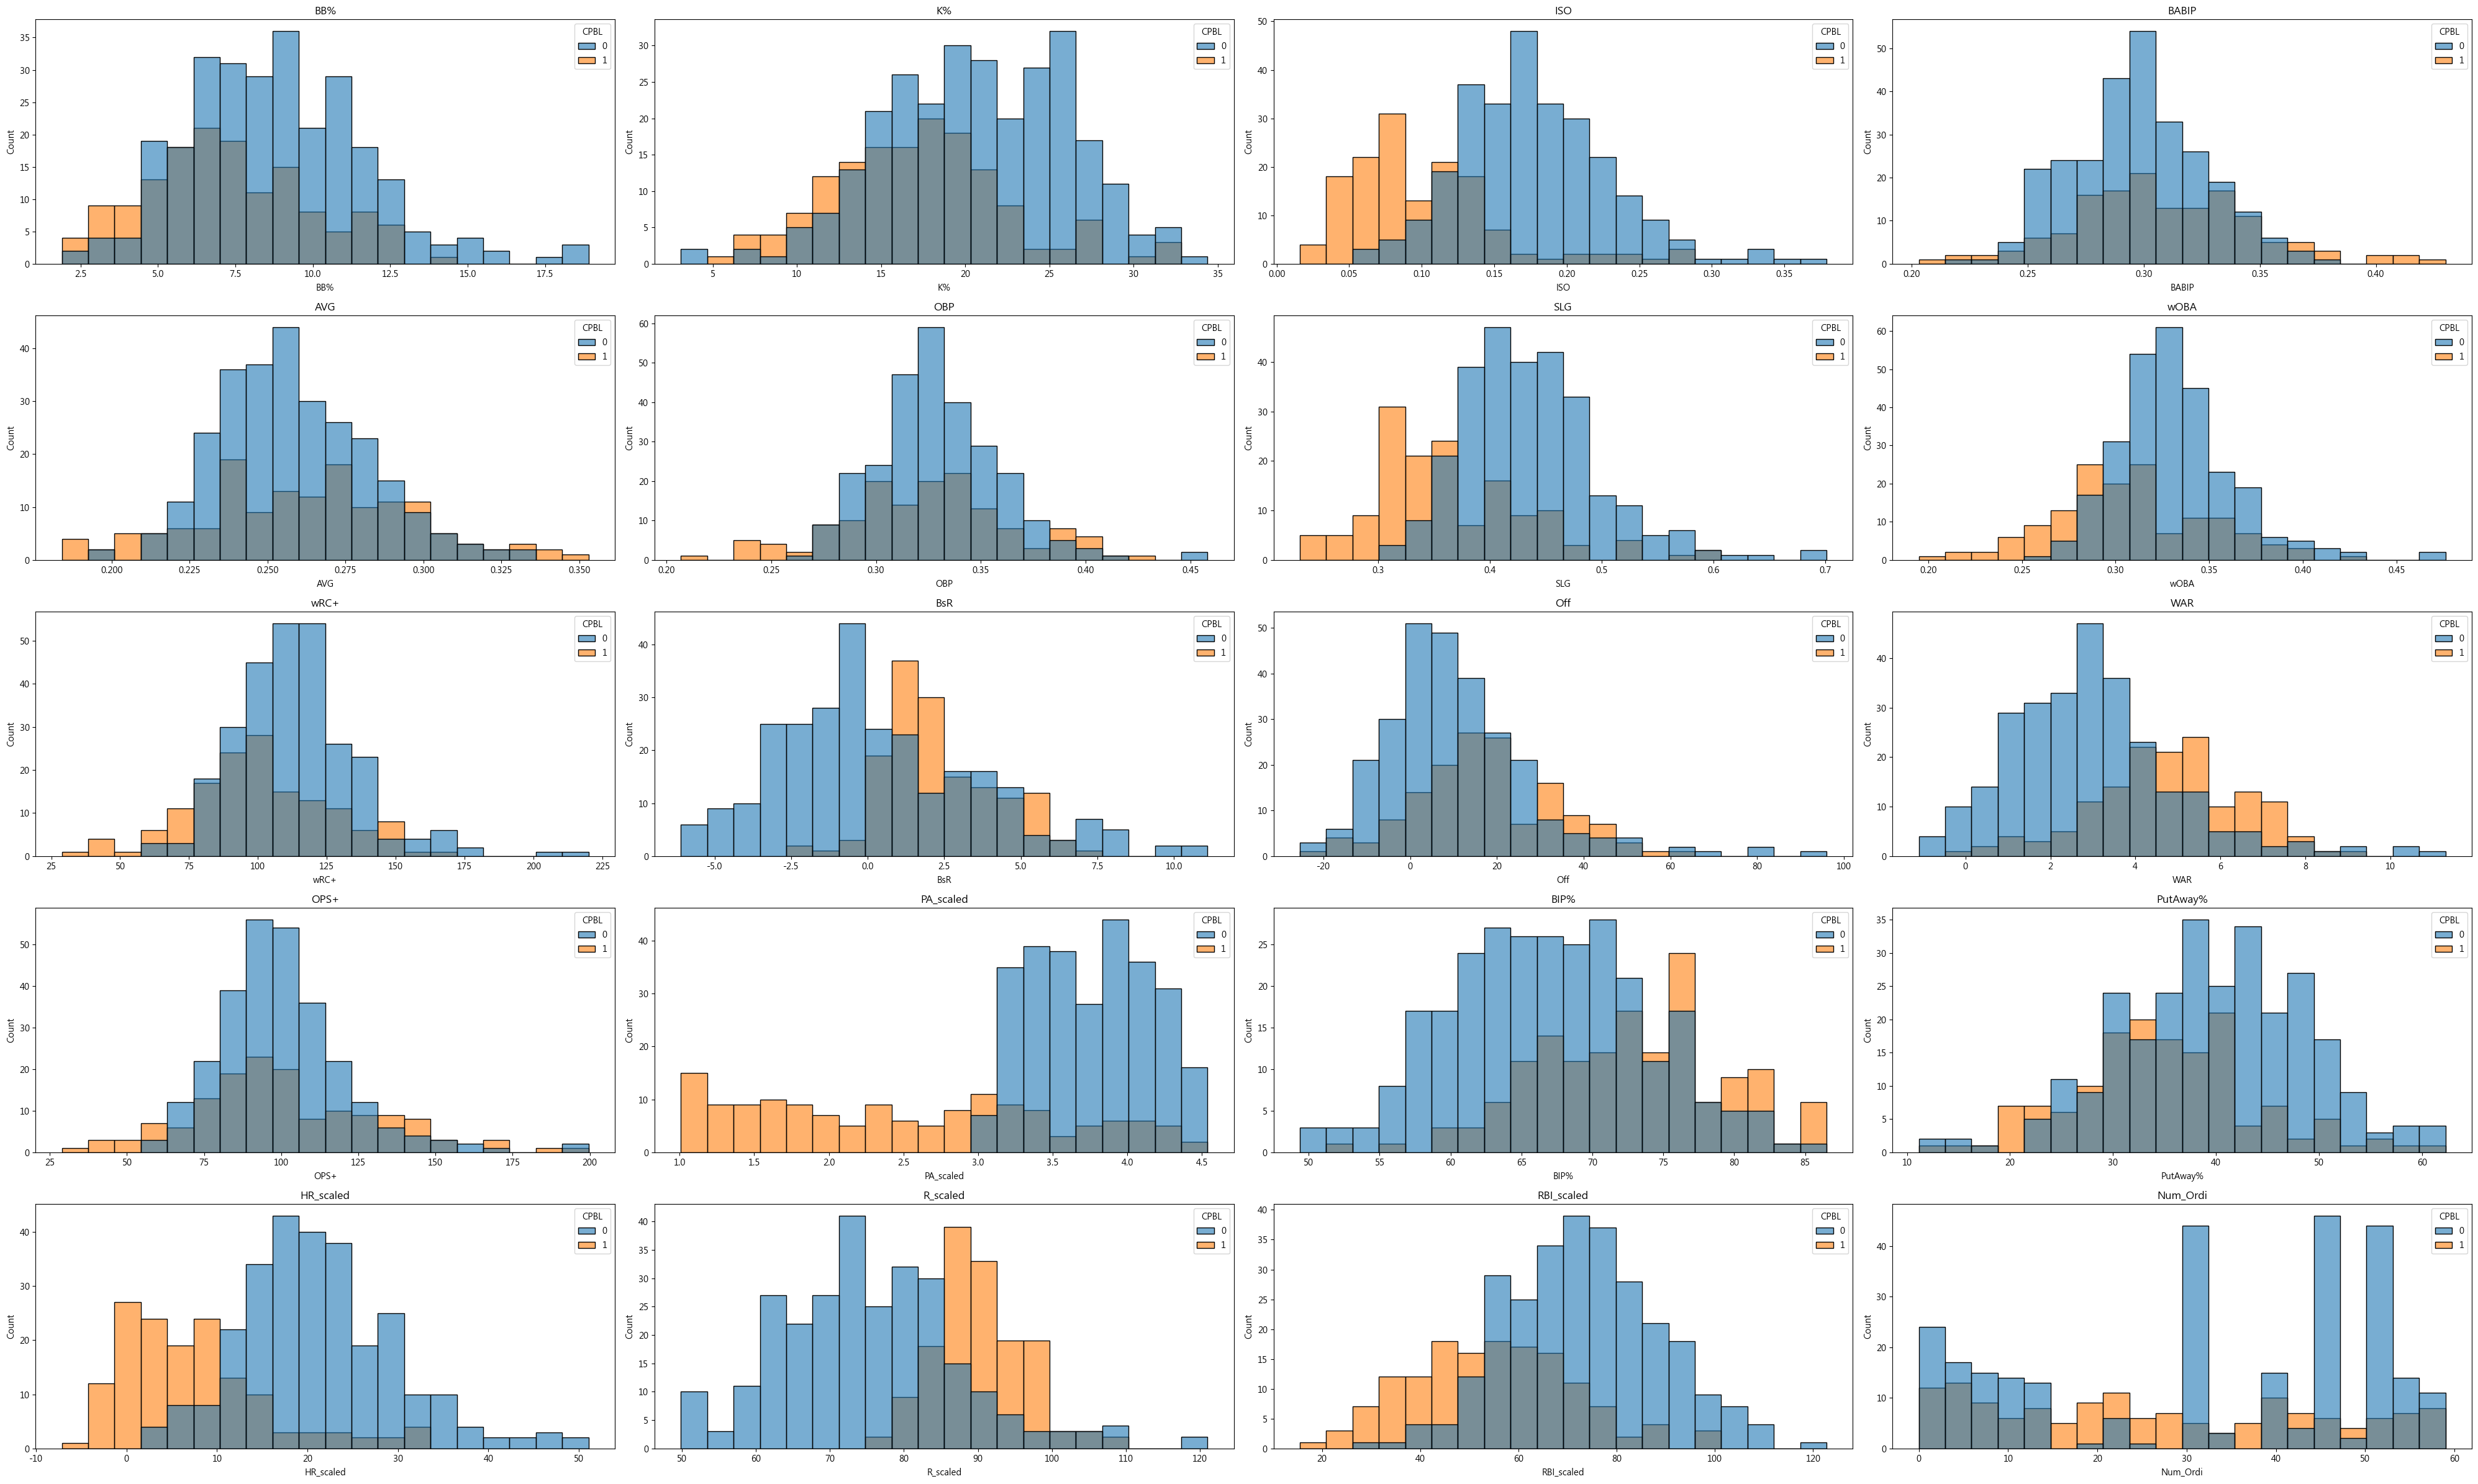

<Figure size 640x480 with 0 Axes>

In [403]:
col = [c for c in df_num.columns if c != 'CPBL']

fig, axes = plt.subplots(5, 4, figsize=(40, 24))
axes = axes.flatten()

for i, c in enumerate(col):
    sns.histplot(data=df_num, x=c, hue='CPBL', bins=20, alpha=0.6, ax=axes[i])
    axes[i].set_title(c)

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

In [406]:
df.update(df_num)
df['CPBL'] = df_num['CPBL'] 


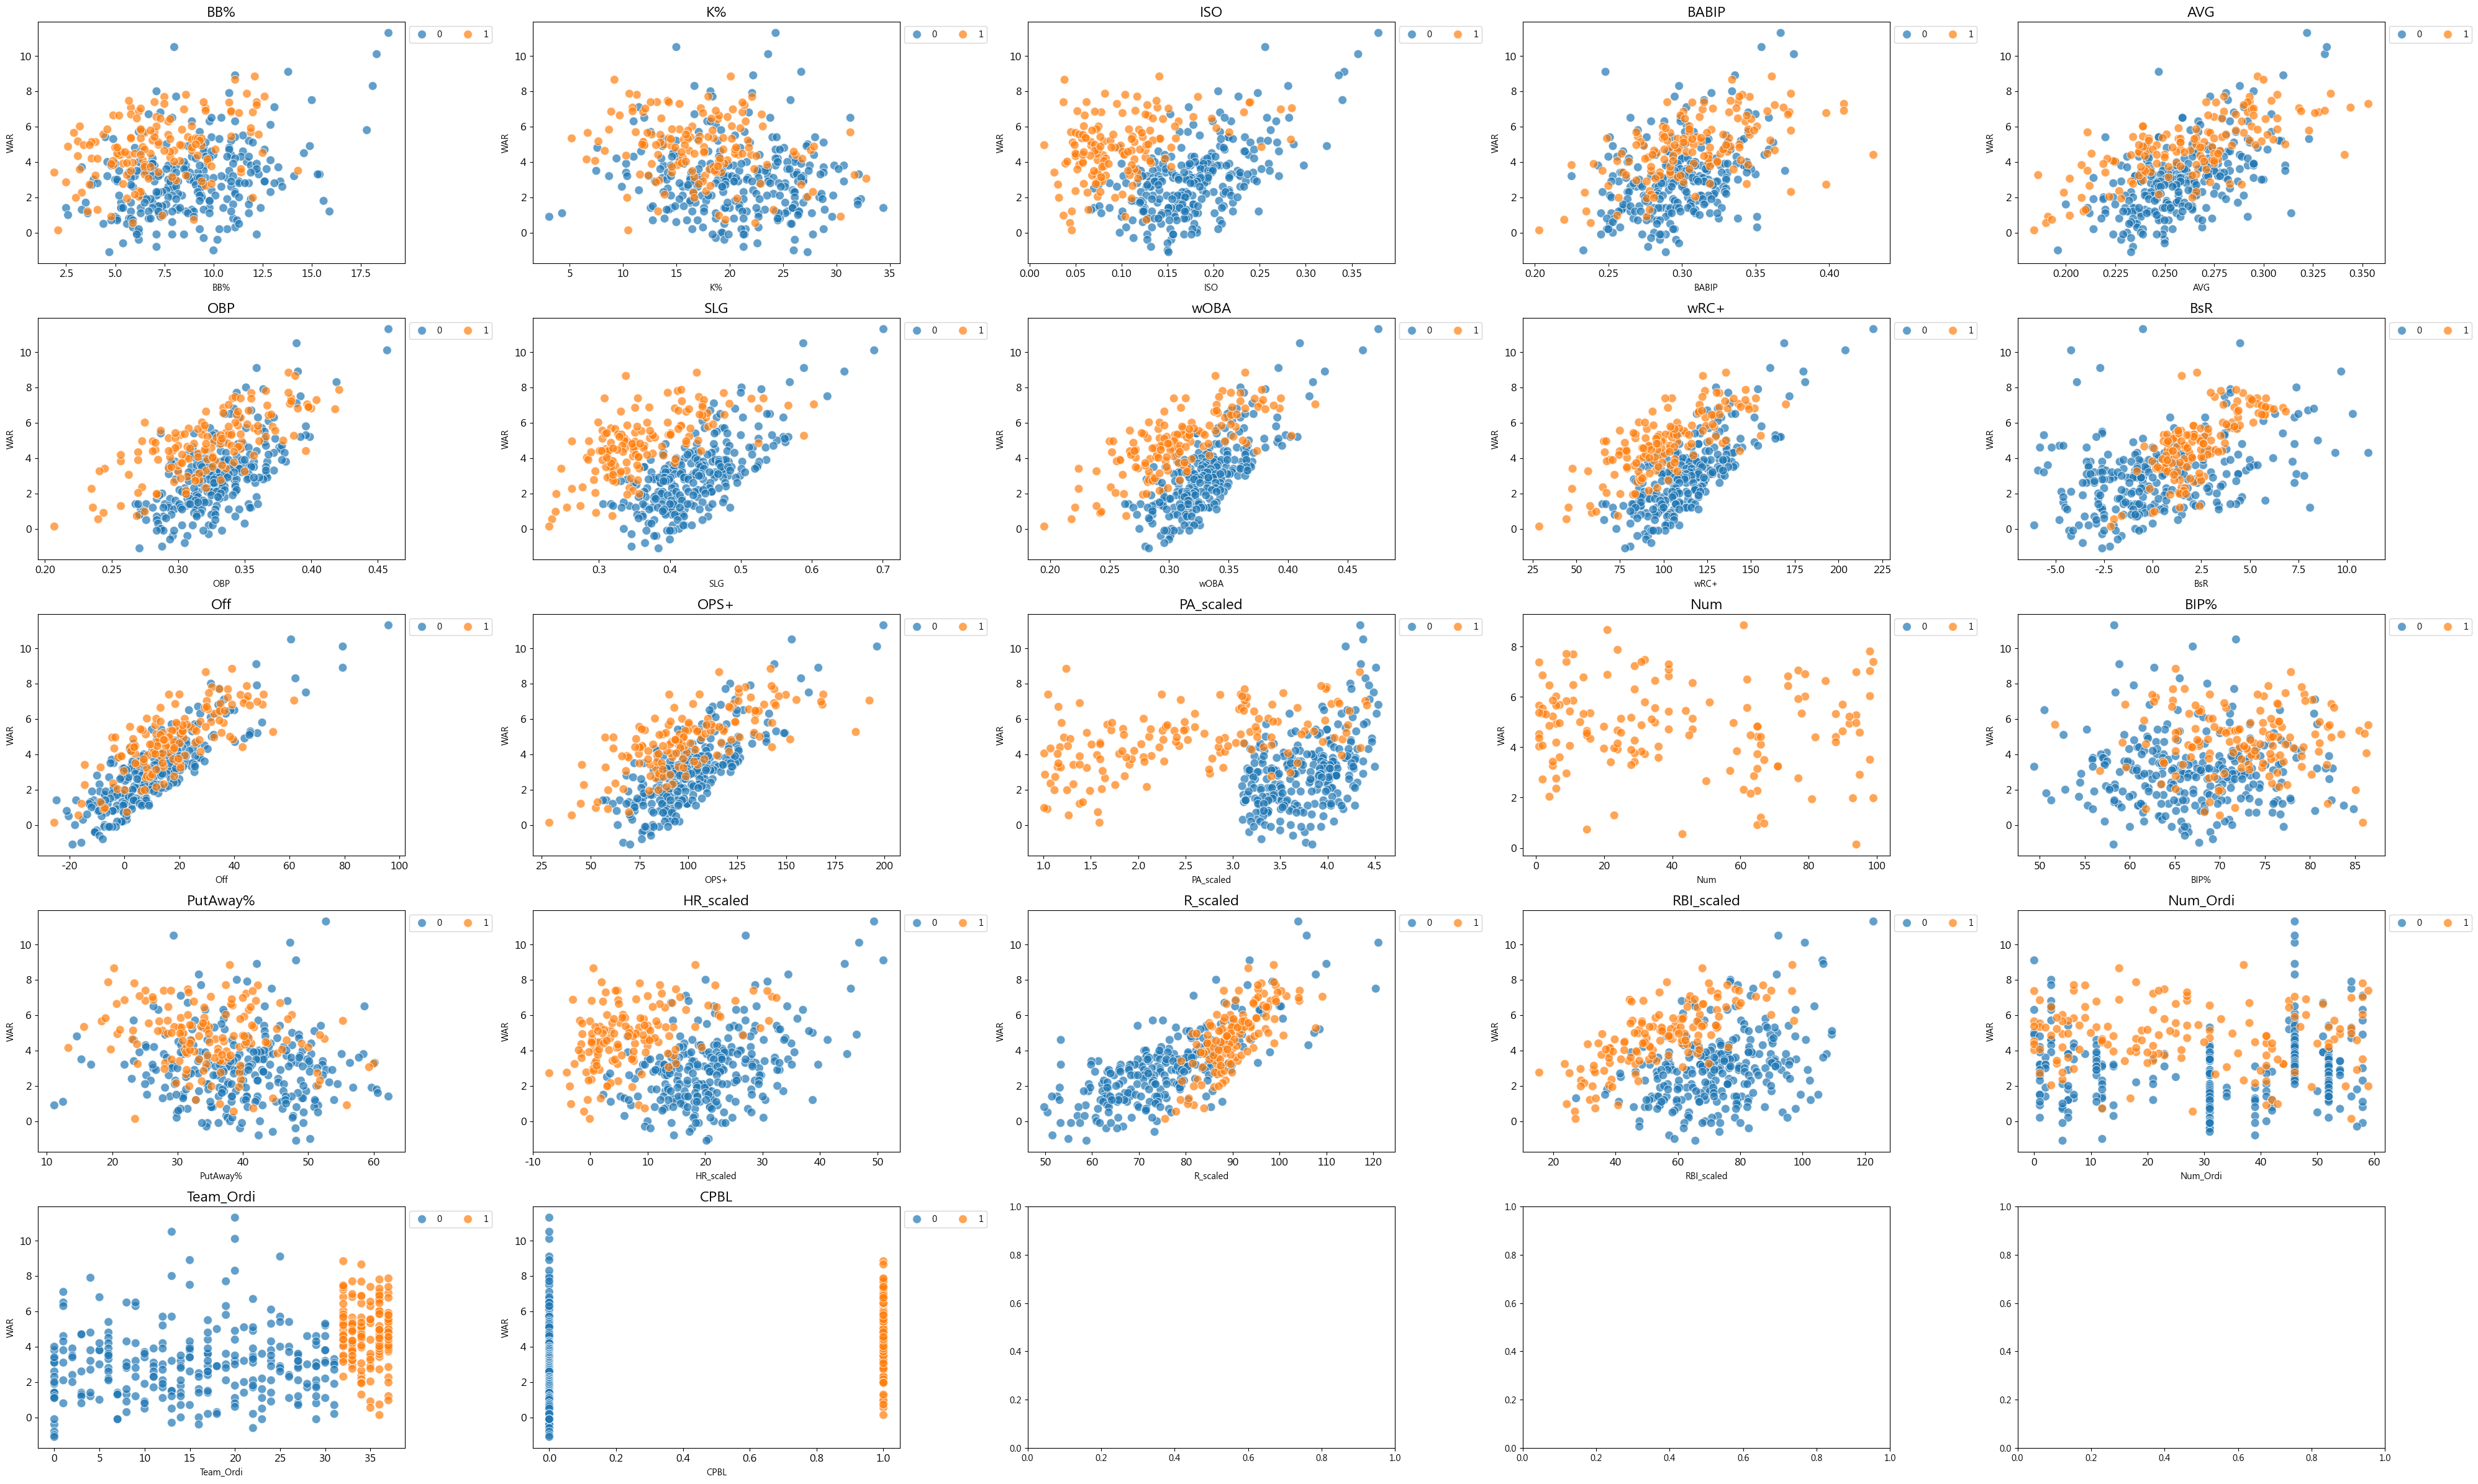

In [407]:
col = [x for x in df.select_dtypes(include=np.number).columns 
       if x not in ['WAR']]


fig, axes = plt.subplots(5, 5, figsize=(40, 24))


for i, j in enumerate(col):
    sns.scatterplot(
    data=df,
    x=j,
    y='WAR',
    hue='CPBL',
    s=100,
    alpha=0.7,
    ax=axes[i//5, i%5]
    )
    axes[i//5, i%5].set_title(j, fontsize=16)
    axes[i//5, i%5].tick_params(labelsize=12)
    axes[i//5, i%5].legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()

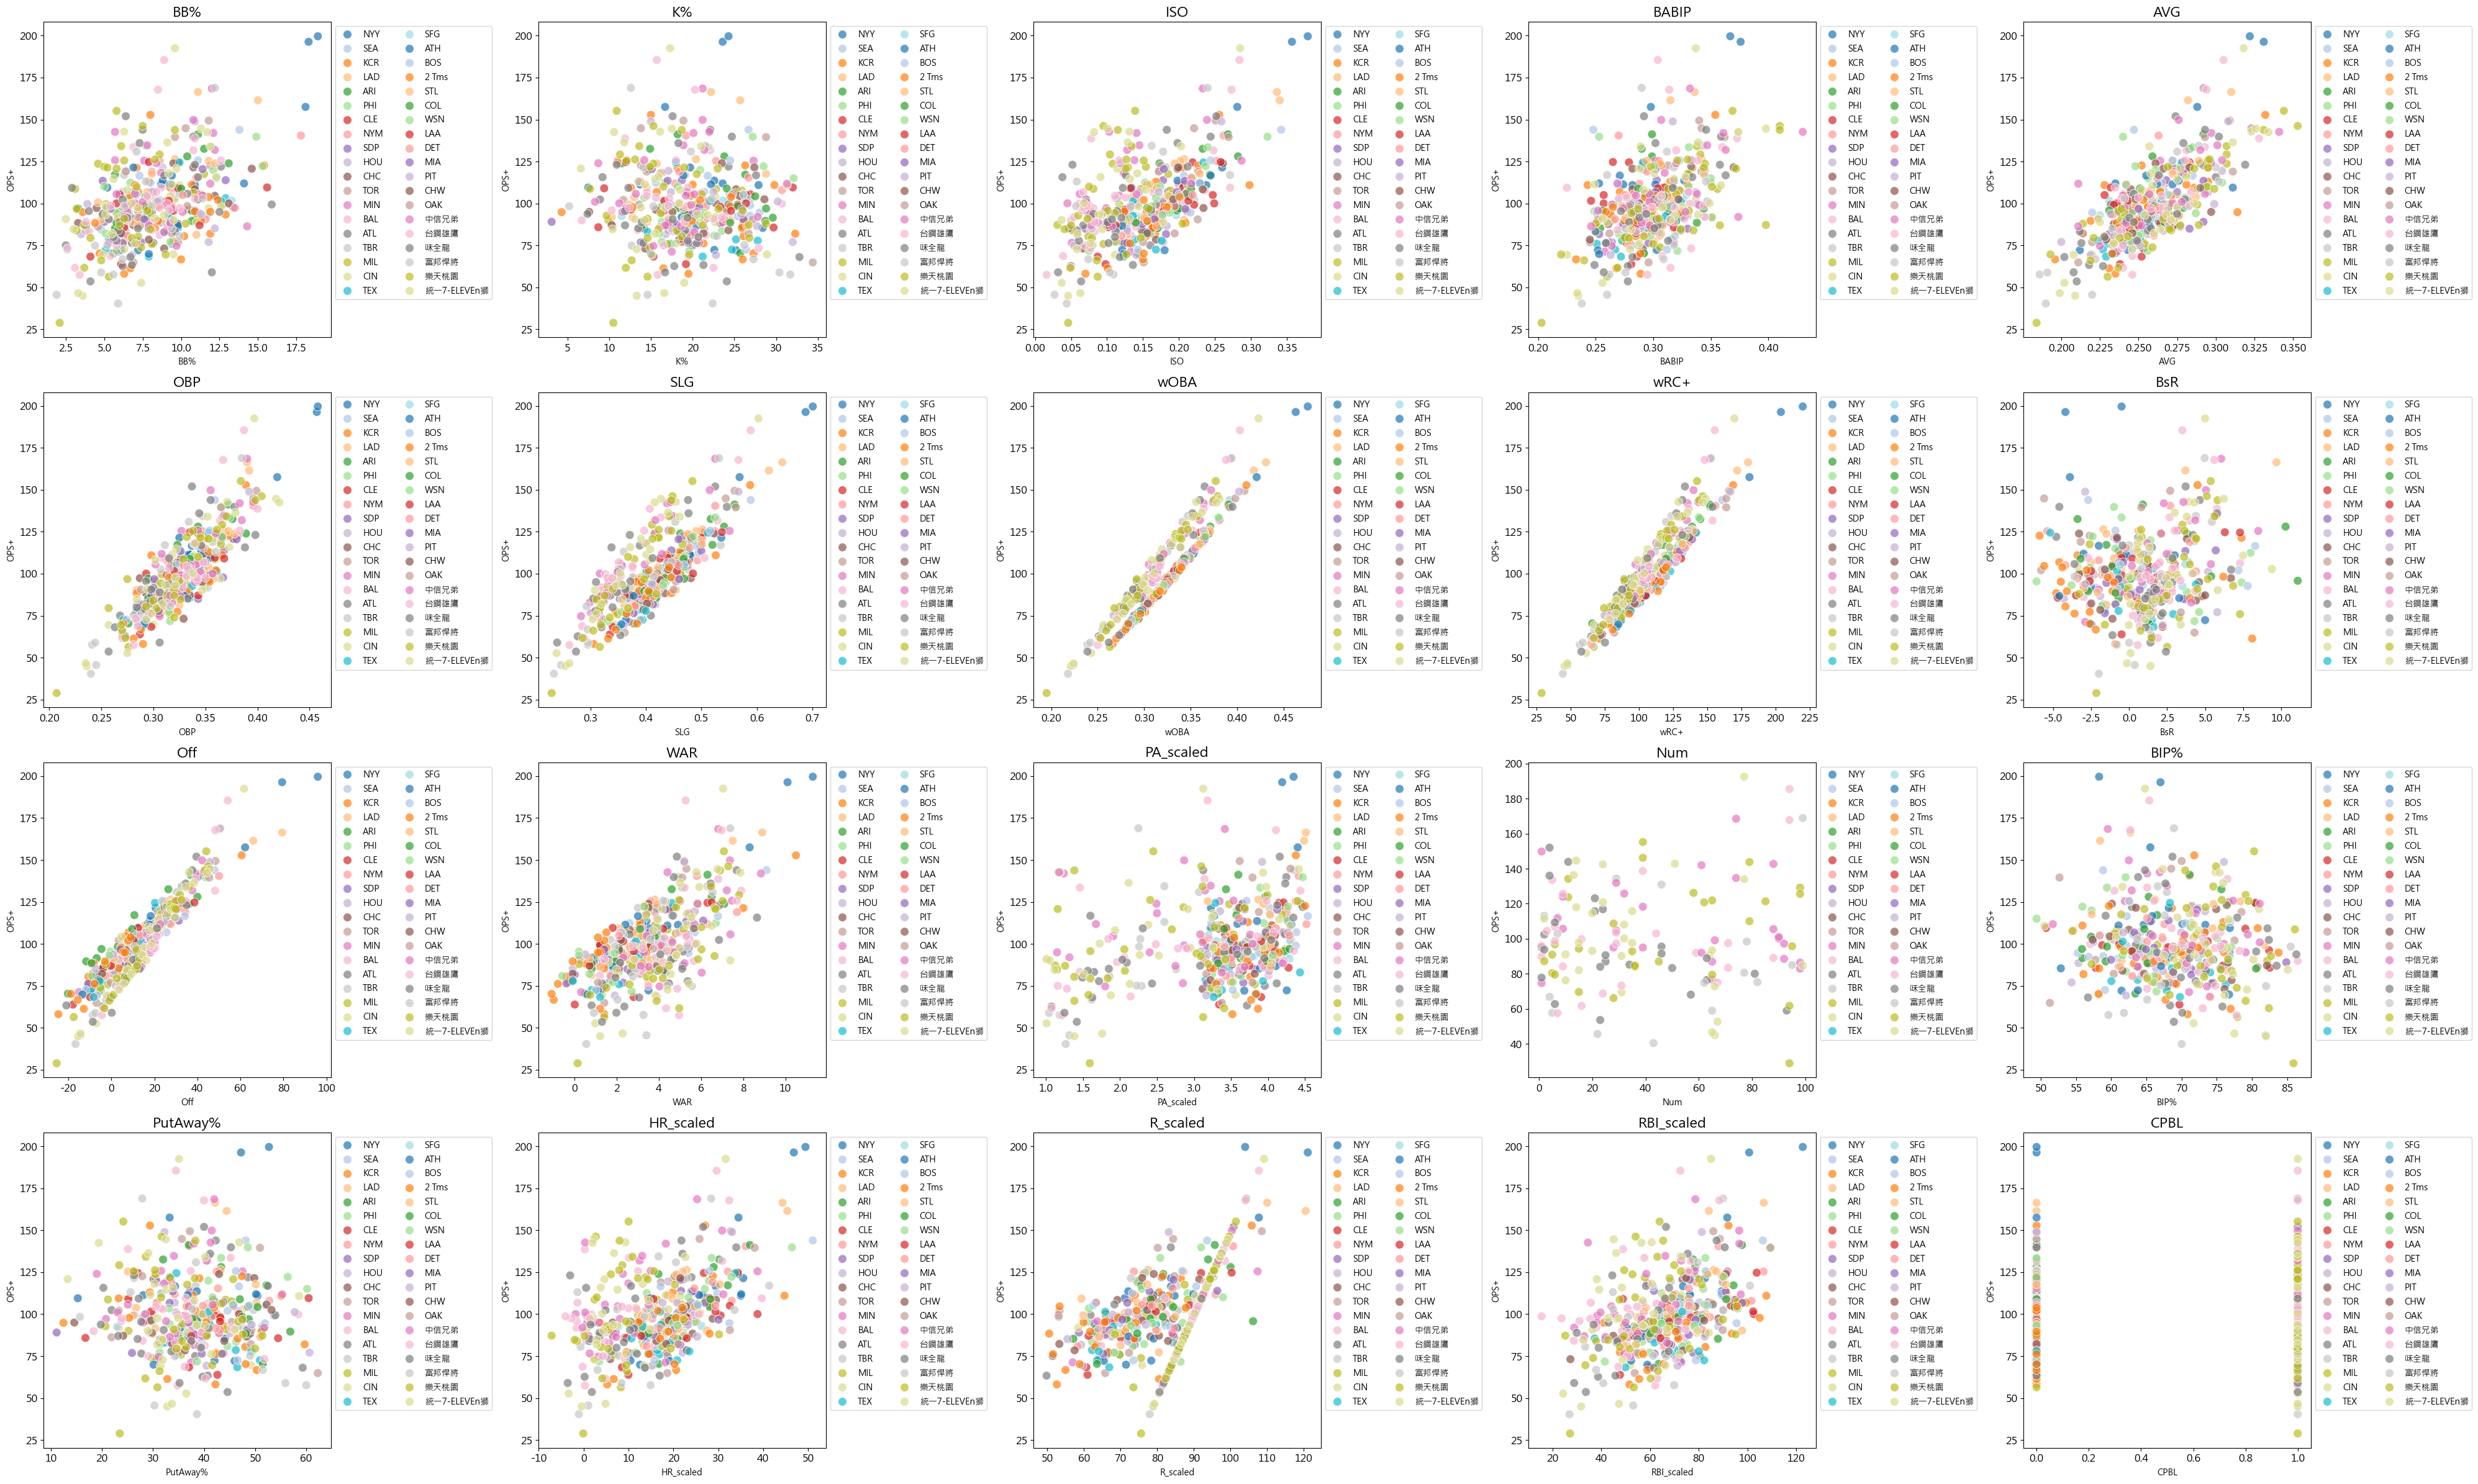

In [408]:
col = [x for x in df.select_dtypes(include=np.number).columns 
       if x not in ['OPS+', 'Num_Ordi', 'Team_Ordi']]


fig, axes = plt.subplots(4, 5, figsize=(40, 24))
palette = sns.color_palette("tab20", n_colors=df['Team'].nunique())


for i, j in enumerate(col):
    sns.scatterplot(
    data=df,
    x=j,
    y='OPS+',
    hue='Team',
    s=100,
    palette=palette,
    alpha=0.7,
    ax=axes[i//5, i%5]
    )
    axes[i//5, i%5].set_title(j, fontsize=16)
    axes[i//5, i%5].tick_params(labelsize=12)
    axes[i//5, i%5].legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()

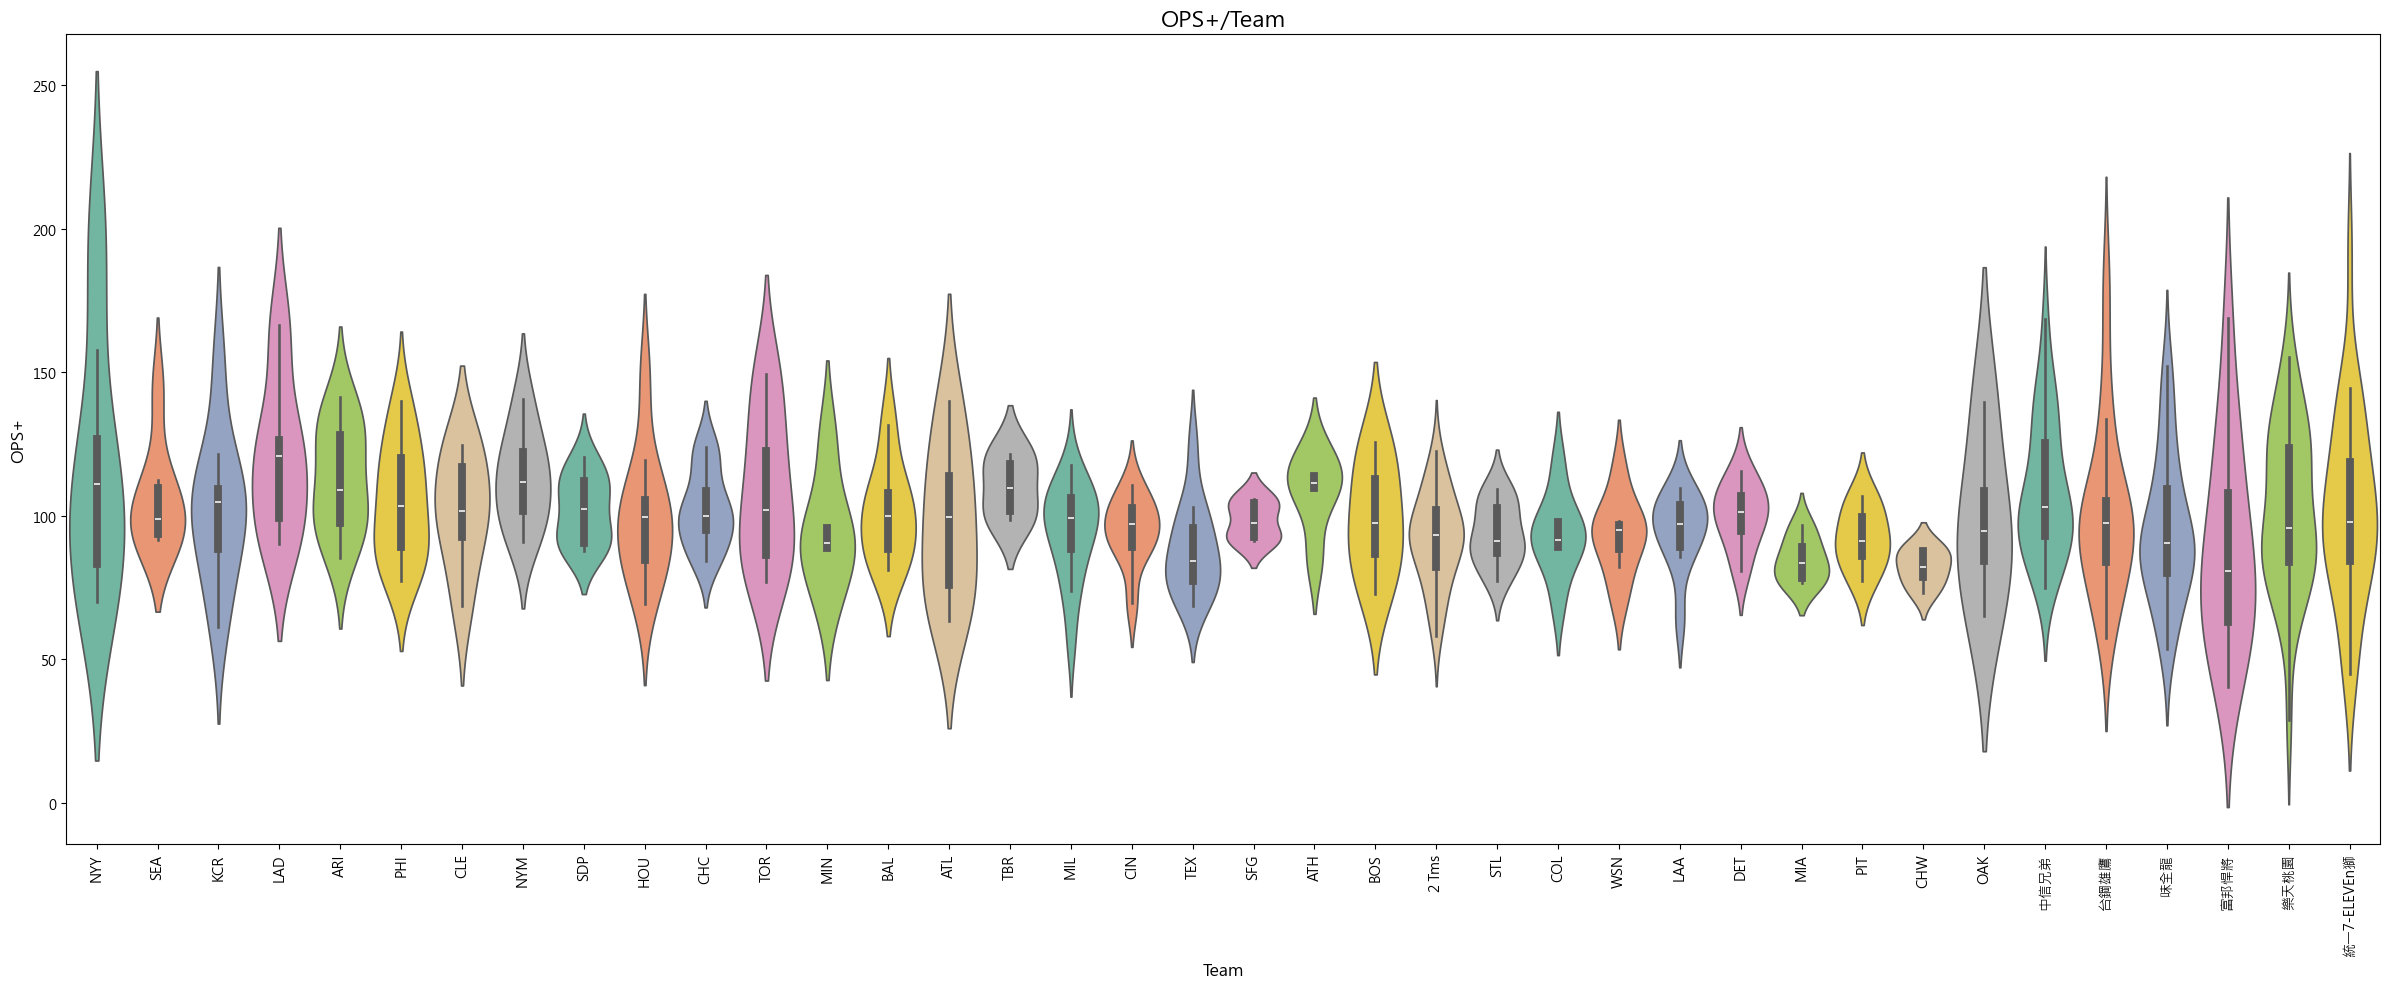

In [409]:
plt.figure(figsize=(24,10))

sns.violinplot(
    data=df,
    x='Team',
    y='OPS+',
    palette='Set2', 
    inner='box',   
    width=0.9,
    hue='Team'
)

plt.xticks(rotation=90)

plt.xlabel('Team', fontsize=12)
plt.ylabel('OPS+', fontsize=12)
plt.title('OPS+/Team', fontsize=16)

plt.tight_layout()
plt.show()